<a href="https://colab.research.google.com/github/Nidhi89717/tensorflow/blob/main/03_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with TensorFlow

## Typical architecture of a classification neural network 

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem we're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


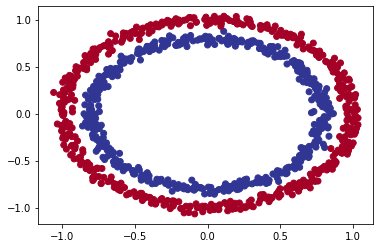

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [ ]:
# shape of features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
# how many samples we have
len(X), len(y)

(1000, 1000)

## Steps in modelling


1.   Create or Import a model
2.   Compile the model
3.   Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate....




In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['accuracy'])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 8ms/step - loss: 2.6793 - accuracy: 0.4690
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7567 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.4880
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4930
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4920


In [ ]:
model_1.fit(X,y,epochs=200,verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933825016021729, 0.5]

In [ ]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving model

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.5080


[0.6954038739204407, 0.5080000162124634]

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


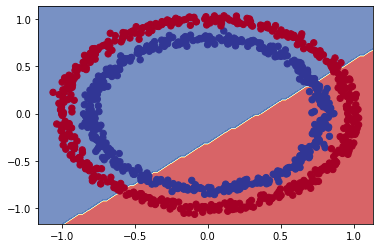

In [ ]:
plot_decision_boundary(model_3,X,y)

In [ ]:
tf.random.set_seed(42)

#Create some regression data
X_reg = np.arange(0,1000,5)
y_reg = np.arange(100,1100,5)

# Split regression data into training and testing data
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

#Fit the model into regression data

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = ['mae'],
                optimizer = tf.keras.optimizers.Adam(),
                metrics= ['mae'])

model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 520.3199 - mae: 520.3199
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 397.3120 - mae: 397.3120
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 280.0967 - mae: 280.0967
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 159.4128 - mae: 159.4128
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 55.5296 - mae: 55.5296
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 85.7346 - mae: 85.7346
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 84.8419 - mae: 84.8419
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 51.8088 - mae: 51.8088
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 49.6200 - mae: 49.6200
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 48.6110 - mae: 48.6110
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


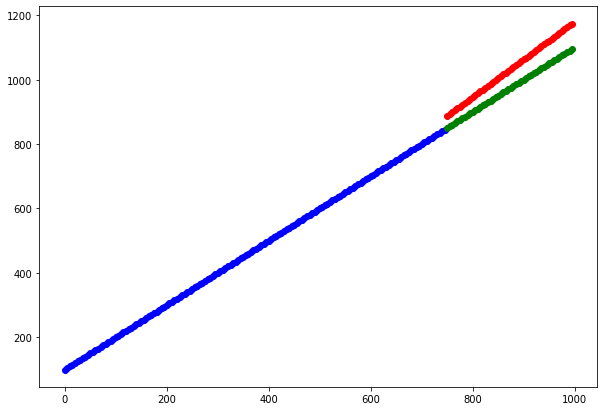

In [ ]:
# Make Predictions
y_reg_pred = model_3.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Training data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Testing data')
plt.scatter(X_reg_test,y_reg_pred,c='r',label='Predictions');

## The missing piece - Non-linearity

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.0793 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0654 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0441 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0218 - accuracy: 0.4880
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9968 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9932 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9919 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9903 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9890 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9878 - accuracy: 0.4870
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


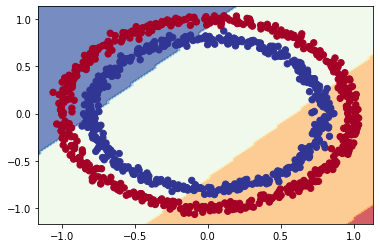

In [ ]:
# check the decision boundary for model_4
plot_decision_boundary(model_4,X,y);

In [ ]:
# Neural Network with a Non-linear activation function
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.2397 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1811 - accuracy: 0.4770
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1085 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9701 - accuracy: 0.4730
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8578 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8550 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8537 - accuracy: 0.4730
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8526 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8434 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8396 - accuracy: 0.4730
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.legacy.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_6.fit(X,y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


32/32 [==============================] - 1s 4ms/step - loss: 4.9743 - accuracy: 0.4470
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.7512 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5168 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 3.4110 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 3.2122 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1301 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 3.0297 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8469 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.4070 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9134 - accuracy: 0.4790
Epoch 11/100
32/32 [=

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5940 - accuracy: 0.7810


[0.5940481424331665, 0.781000018119812]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


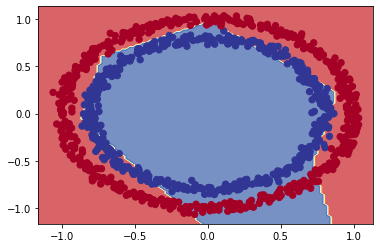

In [ ]:
plot_decision_boundary(model_6,X,y);

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7070 - accuracy: 0.5120
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7036 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6987 - accuracy: 0.4860
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6979 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6962 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4670
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8500


[0.4843183159828186, 0.8500000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


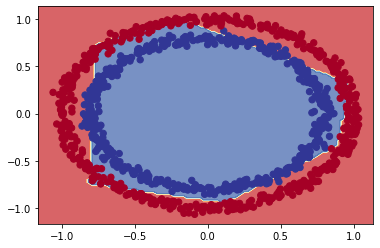

In [ ]:
plot_decision_boundary(model_7,X,y);

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

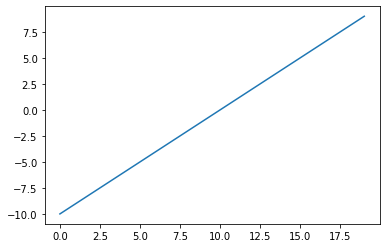

In [ ]:
plt.plot(A)

In [ ]:
# Replicate the sigmoid function
def sigmoid(x):
  return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

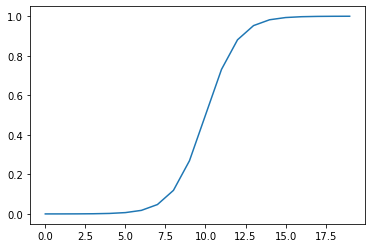

In [ ]:
plt.plot(sigmoid(A));

In [ ]:
# Recreate relu function
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

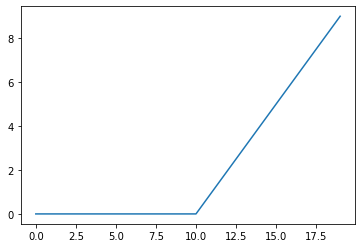

In [ ]:
plt.plot(relu(A));

In [ ]:
# Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

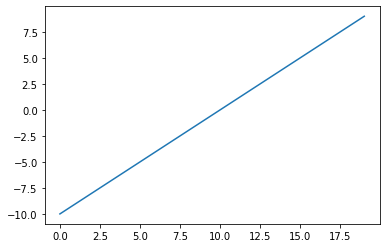

In [ ]:
plt.plot(tf.keras.activations.linear(A));

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Improving our Classificaton model

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
model_7.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 4)                 12        
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.01),
                metrics = ['accuracy'])

history = model_8.fit(X_train,y_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4925
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5250
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5512
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.5863
Epoch 5/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.5675
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6557 - accuracy: 0.6137
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6333 - accuracy: 0.6837
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.7588
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.8512
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.9175
Epoch 11/30
25/25 [

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 1.0000


[0.03691660612821579, 1.0]

In [ ]:
import matplotlib.pyplot as plt

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


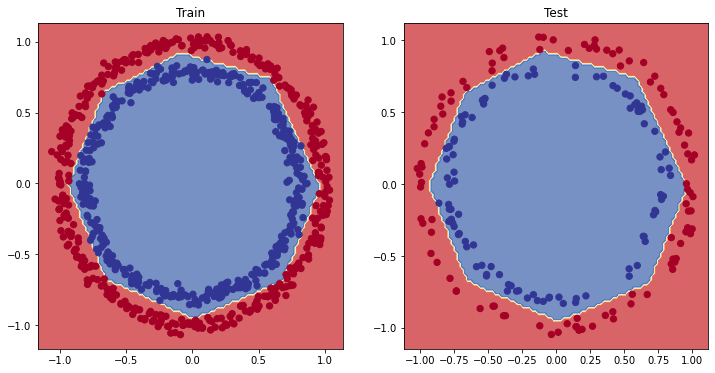

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X_test,y_test);

## Plot the loss (or training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.693355,0.49250
1,0.689551,0.52500
2,0.684678,0.55125
3,0.677947,0.58625
4,0.669472,0.56750
5,0.655748,0.61375
6,0.633308,0.68375
7,0.599790,0.75875
8,0.548325,0.85125
9,0.473527,0.91750


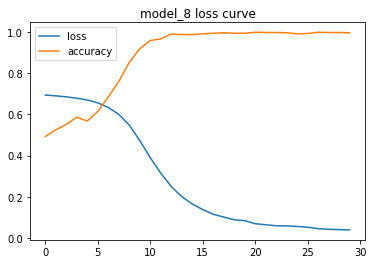

In [ ]:
pd.DataFrame(history.history).plot()
plt.title('model_8 loss curve');

## Finding the best learning rate

In [ ]:
tf.random.set_seed(42) 

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.4725 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4775 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4787 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4837 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4850 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

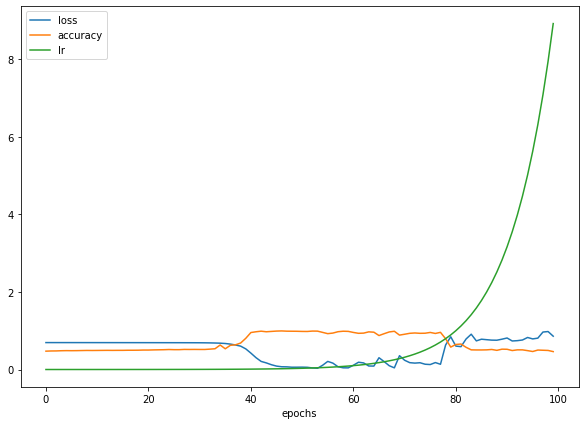

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs');

Text(0.5, 1.0, 'Learning rate vs. Loss')

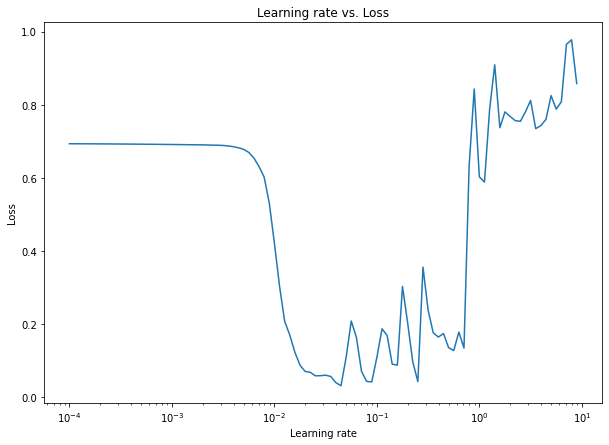

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [ ]:
# Model with higher learning rate
tf.random.set_seed(42) 

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_10.compile(loss='binary_crossentropy',
                 optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6977 - accuracy: 0.4762
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5412
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6825 - accuracy: 0.5950
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6562
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7450
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.8988
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.9287
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.9513
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1891 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1432 - accuracy: 0.9937
Epoch 11/20
25/25 [

In [ ]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9850


[0.04091747850179672, 0.9850000143051147]

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 1.0000


[0.03691660612821579, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


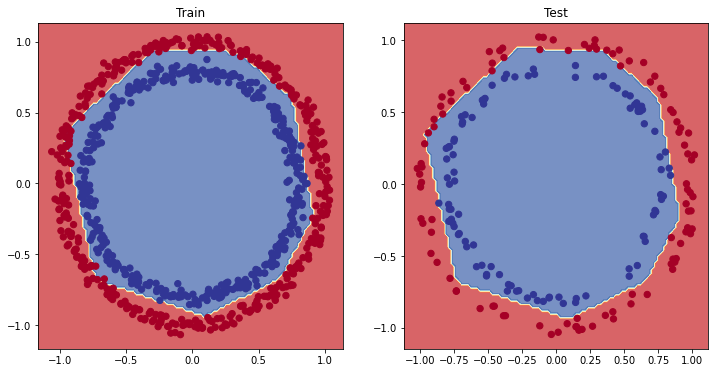

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X_test,y_test)
plt.show();

## More classification evaluation methods

In [ ]:
loss,accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9850
Model loss on the test set: 0.04091747850179672
Model accuracy on the test set: 98.50%


In [ ]:
# Create a confusion matrix

from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)

confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
y_preds[:10]

array([[0.97257596],
       [0.97257596],
       [0.97257596],
       [0.97257596],
       [0.0904658 ],
       [0.00293344],
       [0.9390692 ],
       [0.05558423],
       [0.97257596],
       [0.10531139]], dtype=float32)

In [ ]:
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

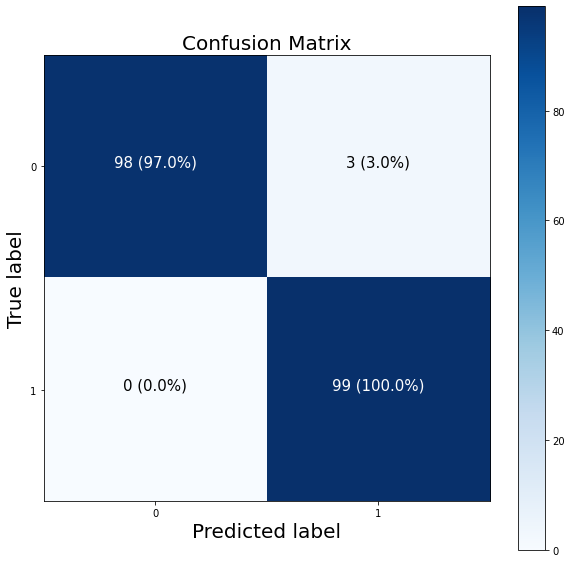

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example(multiclass Classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has been already sorted into training and testing set
(train_data, train_labels),(test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(f'Training sample\n{train_data[0]}\n')
print(f'Training labels\n{train_labels[0]}\n')

Training sample
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [ ]:
#Shape of a single example
train_data[0].shape,train_labels[0].shape

((28, 28), ())

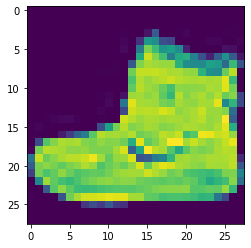

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [ ]:
train_labels[0]

9

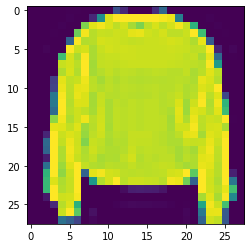

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [ ]:
train_labels[7]

2

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

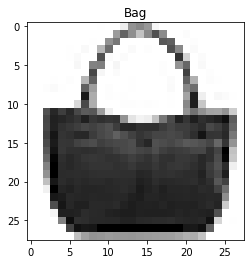

In [ ]:
#Plot an example image and its label
index = 100
plt.imshow(train_data[index],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]]);

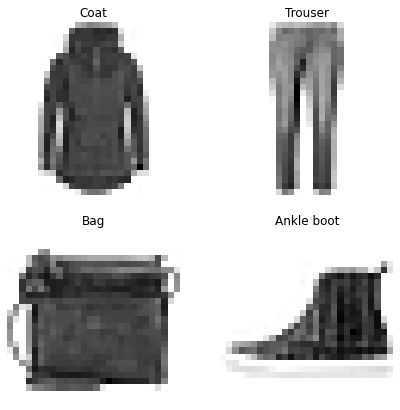

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index],cmap=plt.cm.binary)
  plt.title(class_names[train_labels[random_index]])
  plt.axis(False)

## Building a multi-class classification model


*   Input shape = 28 x 28(shape of an image)
*   Output shape = 10(one per class of clothing)

*   Loss function - tf.keras.losses.CategoricalCrossentropy()
  * If labels are one-hot encoded use CategoricalCrossentropy()
  * If labels are integer form use SparseCategoricalCrossentropy()
*   Output layer activation - Softmax (not sigmoid)




In [ ]:
# Our data needs to be flattened from (28*28 to none,784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28

784

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data,train_labels,
                                epochs=10,
                                validation_data=(test_data,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.6995 - accuracy: 0.0980 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3036 - val_accuracy:

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# min and max of train data
train_data.min(), train_data.max()

(0, 255)

In [ ]:
# Normalization
train_data_norm = train_data/255
test_data_norm = test_data/255

# Check the min and max values
train_data_norm.min(), train_data_norm.max() 

(0.0, 1.0)

In [ ]:
# Build a model
tf.random.set_seed(42) 

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(train_data_norm, train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5260 - accuracy: 0.4094 - val_loss: 1.1177 - val_accuracy: 0.5436
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0218 - accuracy: 0.5771 - val_loss: 0.9917 - val_accuracy: 0.5969
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9364 - accuracy: 0.6284 - val_loss: 0.9261 - val_accuracy: 0.6526
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8575 - accuracy: 0.6795 - val_loss: 0.8493 - val_accuracy: 0.6911
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8039 - accuracy: 0.7066 - val_loss: 0.8122 - val_accuracy: 0.7045
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7673 - accuracy: 0.7375 - val_loss: 0.7830 - val_accuracy: 0.7398
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7291 - accuracy: 0.7566 - val_loss: 0.7564 - val_accuracy:

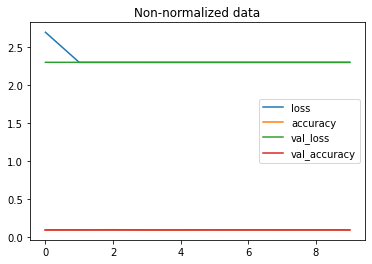

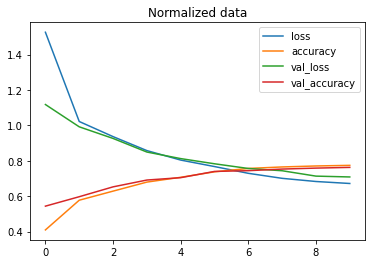

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title='Non-normalized data')
pd.DataFrame(norm_history.history).plot(title='Normalized data');

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *10**(epoch/20) )

find_lr_history = model_13.fit(train_data_norm,train_labels,
                               epochs = 40,
                               validation_data=(test_data_norm,test_labels),
                               callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0353 - accuracy: 0.6074 - val_loss: 0.7410 - val_accuracy: 0.7323 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6724 - accuracy: 0.7537 - val_loss: 0.6598 - val_accuracy: 0.7591 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6001 - accuracy: 0.7796 - val_loss: 0.5940 - val_accuracy: 0.7855 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5424 - accuracy: 0.8097 - val_loss: 0.5478 - val_accuracy: 0.8070 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5224 - accuracy: 0.8160 - val_loss: 0.5431 - val_accuracy: 0.8075 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5106 - accuracy: 0.8211 - val_loss: 0.5327 - val_accuracy: 0.8114 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

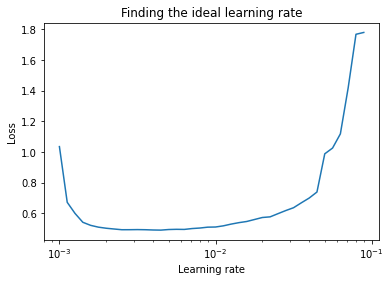

In [ ]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ['accuracy'])

history_14 = model_14.fit(train_data_norm,train_labels,
                               epochs = 20,
                               validation_data=(test_data_norm,test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4483 - accuracy: 0.4275 - val_loss: 1.2584 - val_accuracy: 0.4662
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1996 - accuracy: 0.5007 - val_loss: 1.0881 - val_accuracy: 0.5520
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9873 - accuracy: 0.5920 - val_loss: 0.9043 - val_accuracy: 0.6670
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8025 - accuracy: 0.7211 - val_loss: 0.7459 - val_accuracy: 0.7539
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6945 - accuracy: 0.7581 - val_loss: 0.6890 - val_accuracy: 0.7597
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6465 - accuracy: 0.7686 - val_loss: 0.6706 - val_accuracy: 0.7632
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6230 - accuracy: 0.7738 - val_loss: 0.6406 - val_accuracy:

## Evaluating multi-class model

In [ ]:
import numpy as np

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Make predictions with our model
y_prob = model_14.predict(test_data_norm) #prob ---> prediction probabilities

y_prob[:5]

313/313 [==============================] - 1s 1ms/step


array([[5.71338114e-06, 1.16130363e-29, 1.00666990e-23, 3.21047716e-10,
        1.02297865e-24, 2.29163155e-01, 3.65162978e-13, 5.64120747e-02,
        9.89738691e-09, 7.14419007e-01],
       [3.66207474e-04, 3.86189004e-06, 2.45510414e-01, 1.90492483e-05,
        6.88448846e-01, 2.83556023e-08, 6.17526844e-02, 2.00723903e-07,
        3.89866368e-03, 1.05543263e-08],
       [3.86908127e-04, 9.71072853e-01, 8.35004915e-03, 1.93657298e-02,
        3.53879237e-04, 5.23947383e-05, 3.91767302e-04, 1.27865078e-05,
        2.73105638e-06, 1.08116674e-05],
       [3.86908127e-04, 9.71072853e-01, 8.35004915e-03, 1.93657298e-02,
        3.53879237e-04, 5.23947383e-05, 3.91767302e-04, 1.27865078e-05,
        2.73105638e-06, 1.08116674e-05],
       [1.25120774e-01, 2.00021586e-05, 1.58684343e-01, 1.99863464e-02,
        1.32411912e-01, 1.62380693e-05, 5.46404064e-01, 1.68014667e-04,
        1.71382669e-02, 5.01453469e-05]], dtype=float32)

In [ ]:
y_prob[0],tf.argmax(y_prob[0]),class_names[tf.argmax(y_prob[0])]

(array([5.71338114e-06, 1.16130363e-29, 1.00666990e-23, 3.21047716e-10,
        1.02297865e-24, 2.29163155e-01, 3.65162978e-13, 5.64120747e-02,
        9.89738691e-09, 7.14419007e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all prediction probabilities into integers
y_preds = y_prob.argmax(axis=1)

y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
confusion_matrix(y_true=test_labels,y_pred = y_preds)

array([[644,   5,  22, 107,   2,   0, 207,   1,  11,   1],
       [  1, 953,  14,  28,   1,   0,   3,   0,   0,   0],
       [  8,  11, 617,  11, 264,   0,  88,   0,   1,   0],
       [ 26,  43,  63, 773,   2,   1,  90,   0,   2,   0],
       [  1,   5, 207,  11, 700,   0,  73,   0,   3,   0],
       [  1,   1,   0,   1,   0, 913,   0,  35,   7,  42],
       [108,   2, 117,  48, 251,   0, 463,   0,  11,   0],
       [  0,   0,   0,   0,   0,  33,   0, 924,   3,  40],
       [  5,   0,   6,   7,   7,   3,  67,   5, 900,   0],
       [  0,   0,   0,   1,   0,   7,   2,  40,   0, 950]])

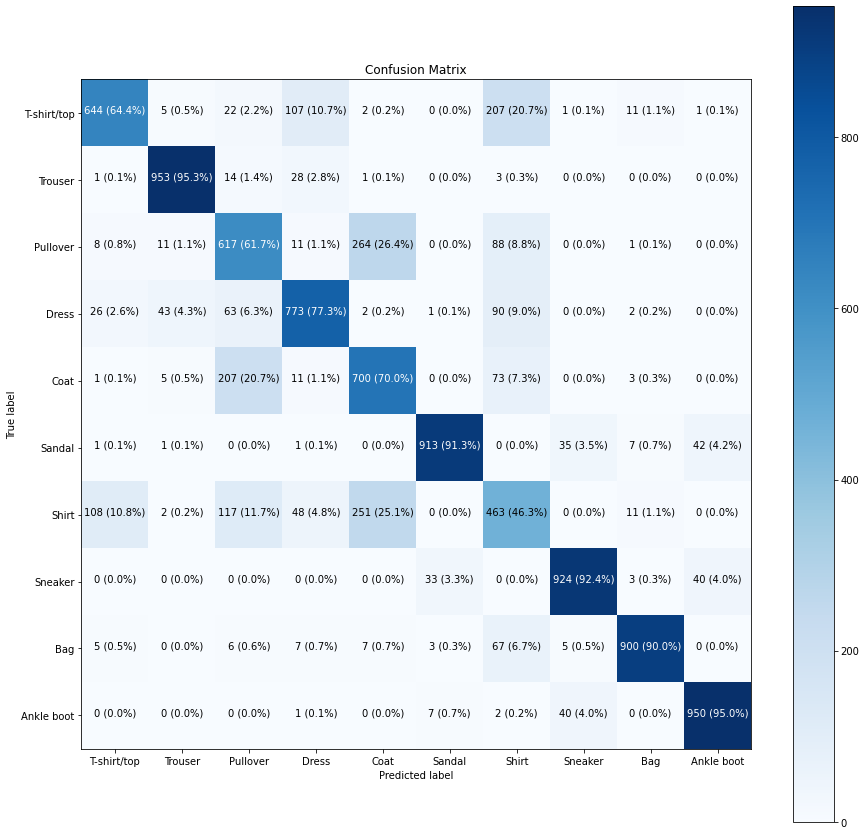

In [ ]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,
                      classes = class_names,
                      figsize=(15,15),
                      text_size=10)

In [ ]:
def plot_random_image(model,images,true_labels,classes):
  i = random.randint(0,len(images))
  
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #plt the image
  plt.imshow(target_image,cmap=plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 28ms/step


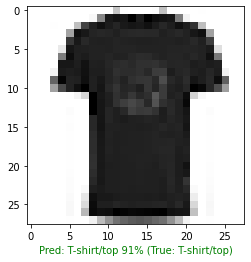

In [ ]:
plot_random_image(model=model_14,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [ ]:
#Find the layers
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1] 

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()

# Shape
weights,weights.shape

(array([[ 0.18224066,  0.12249185, -0.05836862, -0.38285175],
        [ 0.15129527,  0.60911876,  0.46394423, -0.47894168],
        [ 0.40949842,  0.29529926,  0.4766817 , -0.63025695],
        ...,
        [-0.32282752, -0.5306143 ,  0.5479203 , -0.726727  ],
        [-0.03019752, -0.34492394,  0.74010456, -0.6295186 ],
        [ 0.01842349, -0.6225727 ,  0.38566402, -0.5612966 ]],
       dtype=float32), (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Check out the bias vector

In [ ]:
# biases and biases shapes
biases, biases.shape

(array([-0.05721176,  0.54638857,  0.92197376,  2.36919   ], dtype=float32),
 (4,))

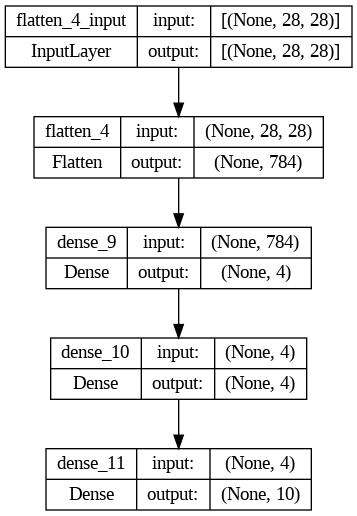

In [ ]:
# See ths inputs and outputs for each layer
from tensorflow.keras.utils import plot_model
plot_model(model_14,show_shapes=True)